**Using Logistic Regression and Random Forest Classifier, we will predict whether or not the borrower has paid back their loan in full.**

**We will use lending data from 2007-2010.
Here are what the columns represent:**



1.   **credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

2. **purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

3.   **int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

4. **installment:** The monthly installments owed by the borrower if the loan is funded.

5. **log.annual.inc:** The natural log of the self-reported annual income of the borrower.

6. **dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).

7. **fico:** The FICO credit score of the borrower.

8. **days.with.cr.line:** The number of days the borrower has had a credit line.

9. **revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

10. **revol.util:**The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

11. **inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.

12. **delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

13. **pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

14. **not.fully.paid:** Whether the loan has been paid in full or not.

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#Load the dataset
data= pd.read_csv('/content/loan_data.csv')

In [3]:
#Display basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
#Shows the top most values of the table
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
# Displays the statistics
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
#Checking whether the data has any null values in each column
data.isnull().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


<Figure size 1500x1000 with 0 Axes>

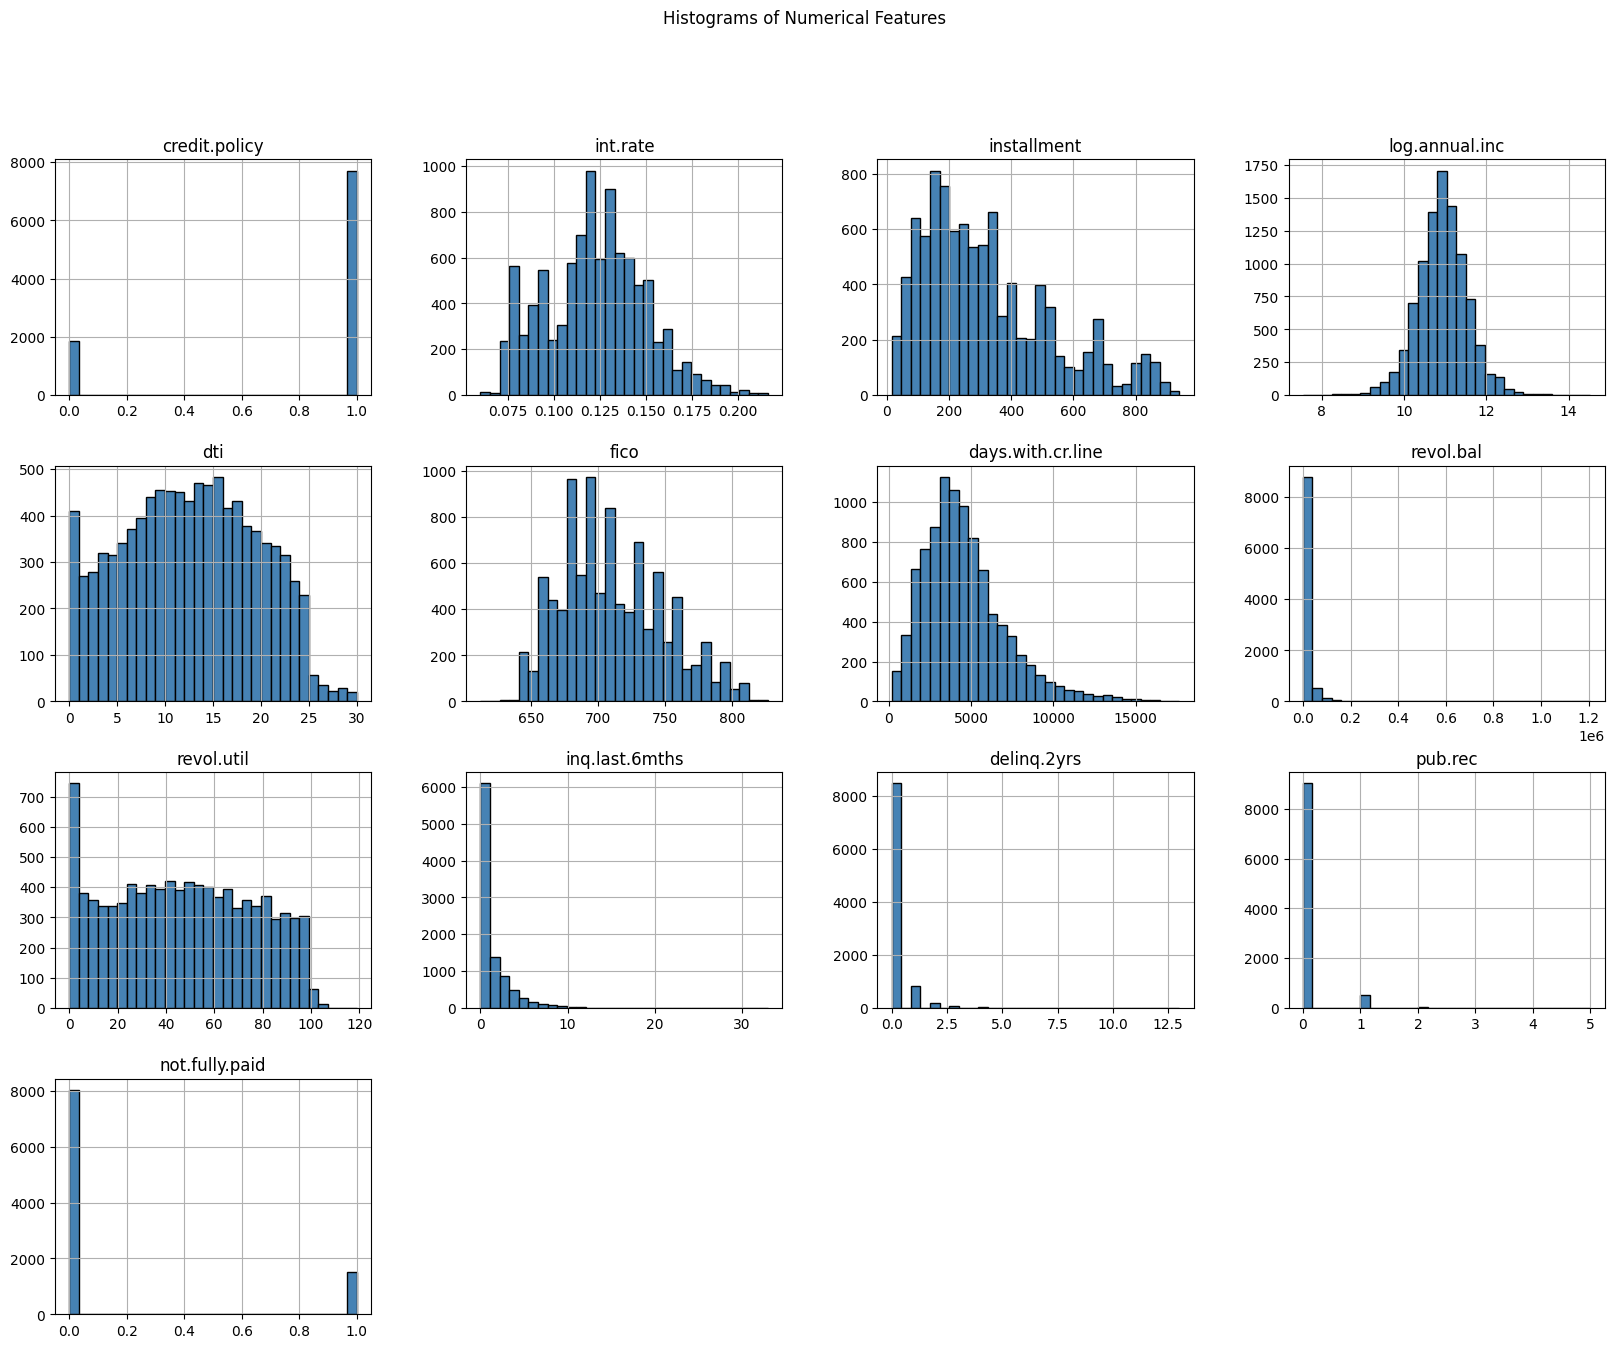

In [7]:
# Visualize the distribution of numerical features
plt.figure(figsize=(15, 10))
data.hist(bins=30, figsize=(20, 15), color='steelblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

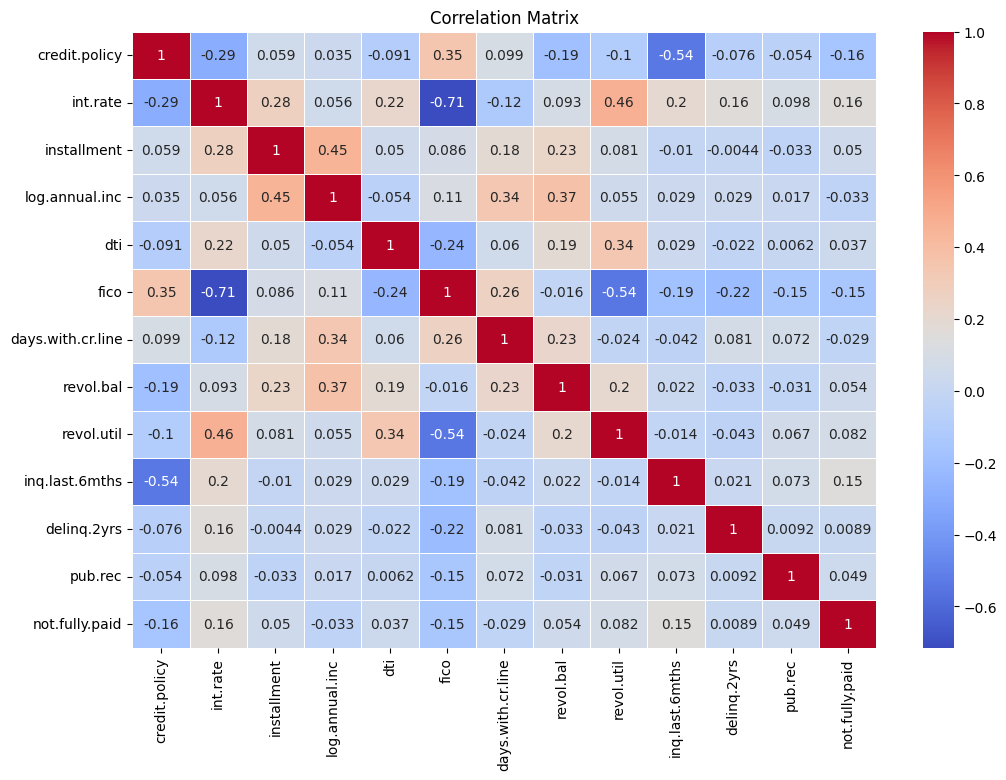

In [8]:
# Visualize correlations (only numerical data)
numerical_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

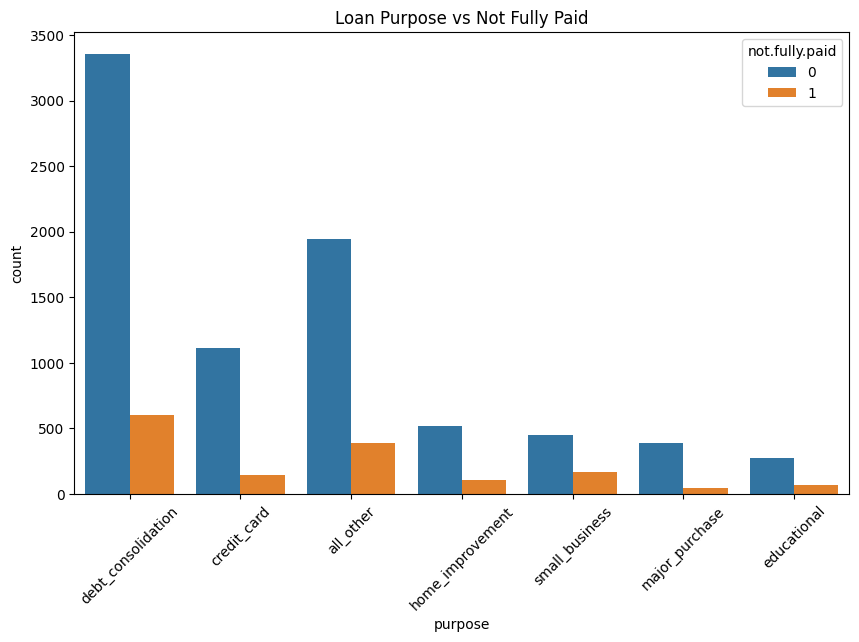

In [9]:
# Visualize the relationship between categorical feature 'purpose' and target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='purpose', hue='not.fully.paid')
plt.title('Loan Purpose vs Not Fully Paid')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'FICO')

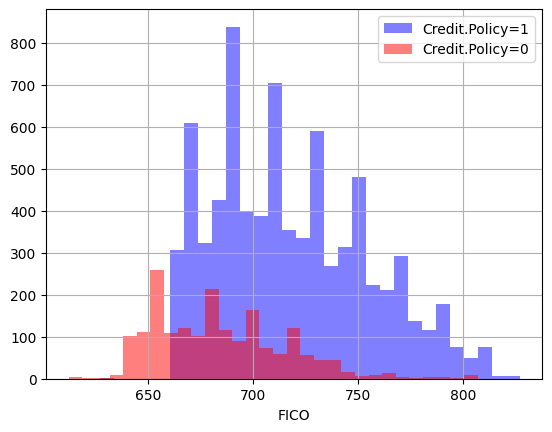

In [10]:
#Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.
data[data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')

data[data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

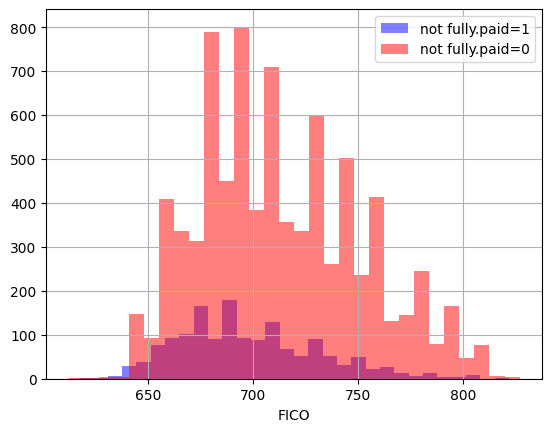

In [11]:
#Creating a histogram of two FICO distributions on top of each other, one for each "not fully.paid" column.
data[data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not fully.paid=1')
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

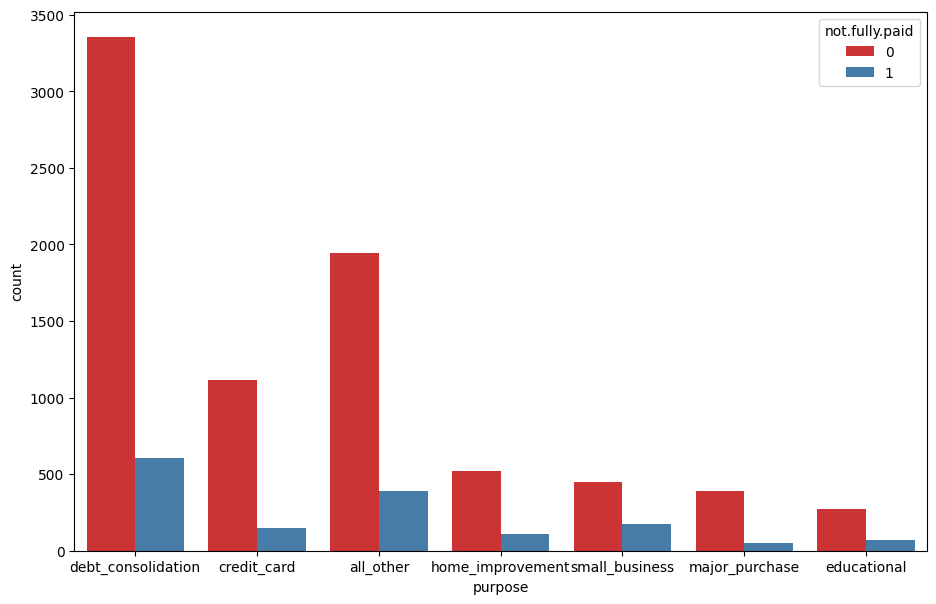

In [12]:
#Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=data,palette='Set1')

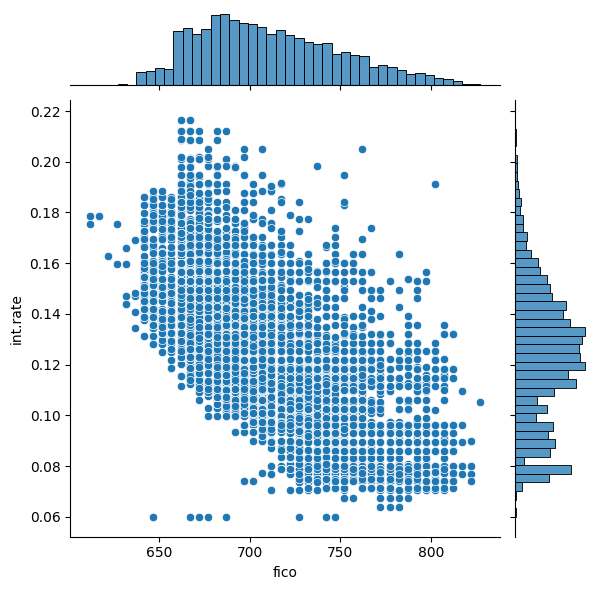

In [13]:
#The trend between FICO score and interest rate
sns.jointplot(x='fico', y='int.rate', data=data, kind='scatter')

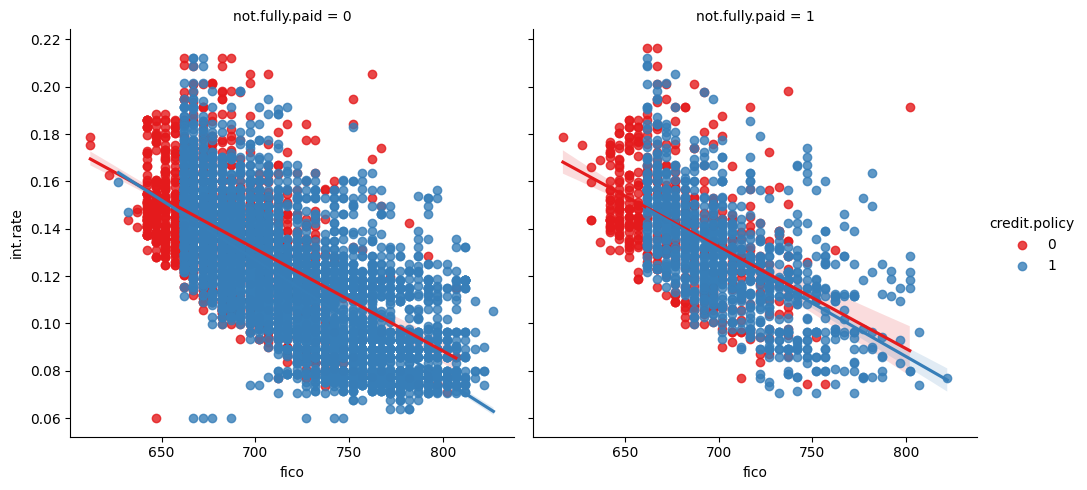

In [14]:
#Creating the following lmplots to see if the trend differed between not.fully.paid and credit.policy**

sns.lmplot(x='fico',y='int.rate',data=data,hue='credit.policy', col='not.fully.paid',palette='Set1')

In [15]:
#The different types of unique values present in the 'purpose' column of the dataset
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [16]:
# Convert categorical data to numerical using one-hot encoding
final_data = pd.get_dummies(data, columns=['purpose'], drop_first=True)

In [17]:
#Rechecking the datatype of all the columns of the data
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [18]:
#Splitting the data into train and test data
X= final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [20]:
#Training the data using Logistic Regression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Make predictions
y_pred = logmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 84.66%
Confusion Matrix:
[[1617    6]
 [ 288    5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.45      0.02      0.03       293

    accuracy                           0.85      1916
   macro avg       0.65      0.51      0.47      1916
weighted avg       0.79      0.85      0.78      1916



In [22]:
#Training the model using Random Forest Classifier setting the no. of estimators to be 600.
rfc=RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=600)

In [23]:
# Make predictions
predictions=rfc.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions)
conf_matrix_rf = confusion_matrix(y_test, predictions)
class_report_rf = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy_rf * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

Accuracy: 84.86%
Confusion Matrix:
[[1620    3]
 [ 287    6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.67      0.02      0.04       293

    accuracy                           0.85      1916
   macro avg       0.76      0.51      0.48      1916
weighted avg       0.82      0.85      0.78      1916

